<a href="https://colab.research.google.com/github/DhongariPavan/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

#Preliminary analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Unsupervised ML project/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.shape

(7787, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
#Looking for null
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#Looking for duplicates
df=df.drop('show_id',axis=1)
df

In [ ]:
#Looking for unique values
df.nunique()

type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [ ]:
#looking for unique values in columns
df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [ ]:
all_countries = df['country'].str.split(',').tolist()
len(all_countries)

7787

In [ ]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
df['listed_in'].unique()

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Documentaries, International Movies, Sports Movies',
       'Independent Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers',
       'International TV Shows, TV Dramas',
       'Comedies, Dramas, Independent Movies', 'Sports Movies',
       'Dramas, Independent Movies, International Movies',
       'Action & Adventure, Dramas, International Movies',
       'Anime Series, International TV Shows', 'Documentaries',
       'Reality TV', 'Documentaries, International

#Type column

In [ ]:
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [ ]:
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


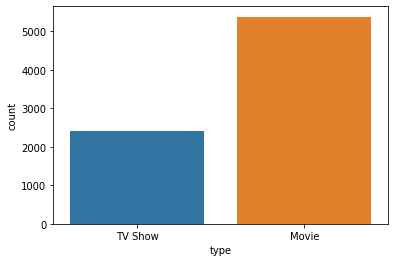

In [ ]:
sns.countplot(df['type'])

#Creating two additional dataframes

In [ ]:
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

#Director column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


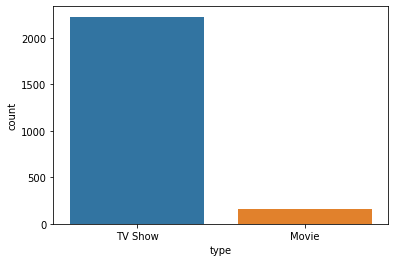

In [ ]:
#Looking for which category have maximum nulls in director column
missing_df=df[df['director'].isna()]
sns.countplot(missing_df['type'])

In [ ]:
missing_df['type'].value_counts()

TV Show    2226
Movie       163
Name: type, dtype: int64

TV shows misses most of the director detailes

# Content ratings

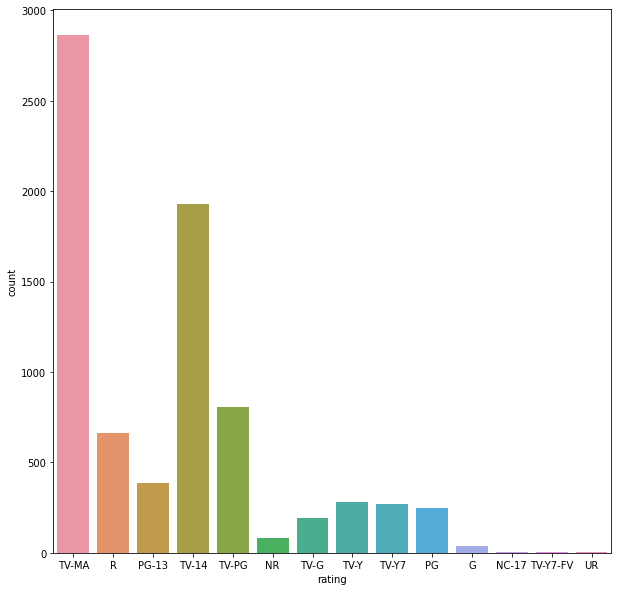

In [ ]:
# count plot on two categorical variable
plt.figure(figsize=(10, 10))
sns.countplot(x ='rating', data =df )
 
# Show the plot
plt.show()

Most of the Contents in netflix is focused for Matured audiences.

<function matplotlib.pyplot.show>

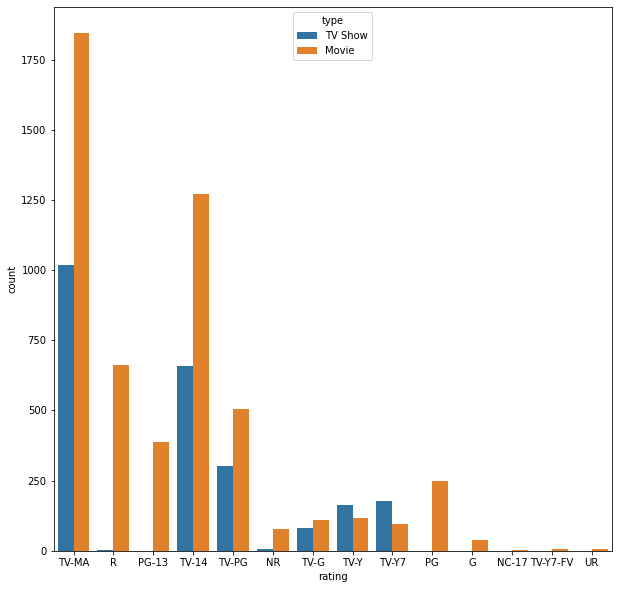

In [ ]:
# count plot on two categorical variable
plt.figure(figsize=(10, 10))
sns.countplot(x ='rating', data =df , hue = 'type' )
 
# Show the plot
plt.show

#Trend in content production per year

In [ ]:
yearly_movies=movies['release_year'].value_counts().sort_index(ascending=False).head(15)

In [ ]:
yearly_shows=tv_shows['release_year'].value_counts().sort_index(ascending=False).head(15)

In [ ]:
yearly_movies

2021     12
2020    411
2019    582
2018    734
2017    744
2016    642
2015    382
2014    244
2013    202
2012    158
2011    127
2010    136
2009    103
2008    102
2007     72
Name: release_year, dtype: int64

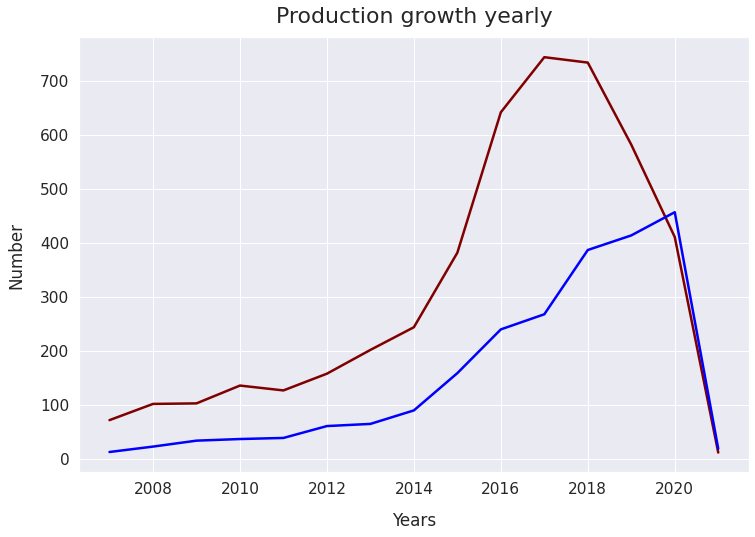

In [ ]:
sns.set(font_scale=1.4)
yearly_movies.plot(figsize=(12, 8), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
yearly_shows.plot(figsize=(12, 8), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22);

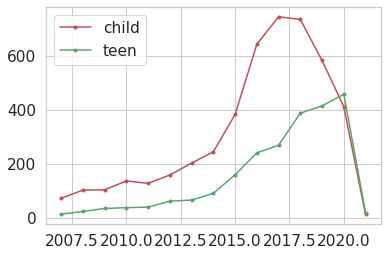

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
plt.plot(yearly_movies, "o-", ms=3,
            color="r", label='child')
plt.plot(yearly_shows, "o-", ms=3,
            color="g", label='teen')
ax.legend()

#Countries producing most number of contents

In [ ]:
df['country'][18].split(',')

['India']

In [ ]:
# Looking for countries and number of netflix productions
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if type(df['country'][i])== str:
    split=df['country'][i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'][i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'][i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [ ]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

In [ ]:
#Top 20 countries
top_countries=country_df.head(20)
top_countries

,country,Productions,TV-Shows,Movies
0,United States,3297,866,2431
1,India,990,75,915
2,United Kingdom,723,256,467
3,Canada,412,126,286
4,France,349,84,265
5,Japan,287,184,103
6,Spain,215,57,158
7,South Korea,212,157,55
8,Germany,199,42,157
9,Mexico,154,53,101


#Looking for the top genres from the top 5 coutries

In [ ]:
top_10=top_countries.loc[:,'country']

In [ ]:
top_10=list(top_10)
top_10

['United States',
 'India',
 'United Kingdom',
 'Canada',
 'France',
 'Japan',
 'Spain',
 'South Korea',
 'Germany',
 'Mexico',
 'China',
 'Australia',
 'Egypt',
 'Turkey',
 'Hong Kong',
 'Italy',
 'Brazil',
 'Belgium',
 'Taiwan',
 'Argentina']

In [ ]:
df_temp=df

In [ ]:
# Adding top 5 countries as columns
for i in top_10:
  df_temp[i]=0


In [ ]:
#Encoding the columns with 1 
for i in range(0,len(df)):
  country_list=[]
  if type(df['country'][i])== str:
    split=df['country'][i].split(',')
    for k in split:
      if k.strip() in top_5:
        df_temp[k.strip()][i]=1

In [ ]:
a = df_temp.groupby(['country']).rating.value_counts()
a

country       rating
Argentina     TV-MA     34
              TV-14      7
              TV-PG      3
              NR         2
              TV-Y       2
                        ..
Vietnam       TV-14      2
              TV-MA      2
              TV-G       1
West Germany  TV-MA      1
Zimbabwe      TV-G       1
Name: rating, Length: 1076, dtype: int64

In [ ]:
from wordcloud import WordCloud,  STOPWORDS 

In [ ]:
STOPWORDS =STOPWORDS .add('Movies')

In [ ]:
df_temp.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,United States,India,United Kingdom,Canada,France,Japan,Spain,South Korea,Germany,Mexico,China,Australia,Egypt,Turkey,Hong Kong,Italy,Brazil,Belgium,Taiwan,Argentina
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


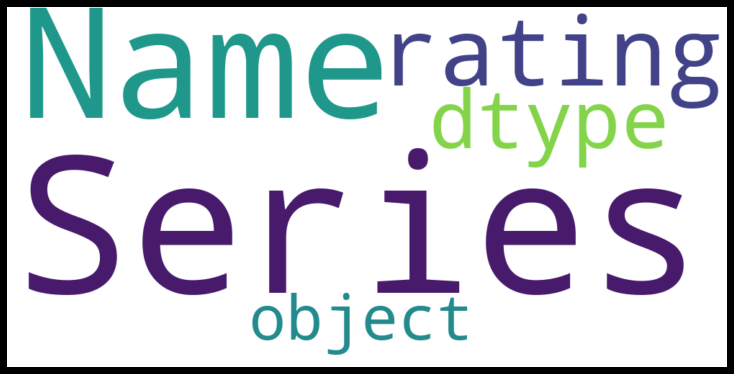

In [ ]:
#Top genres from India
text = df_temp[df_temp['Argentina']==1]['rating']
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'k',
    edgecolor = 'k',)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

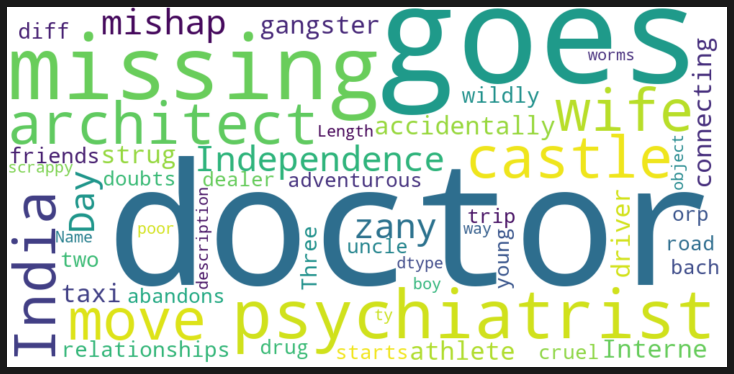

In [ ]:
#Top genres from India
text = df_temp[df_temp['India']==1]['description']
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'k',
    edgecolor = 'k',)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

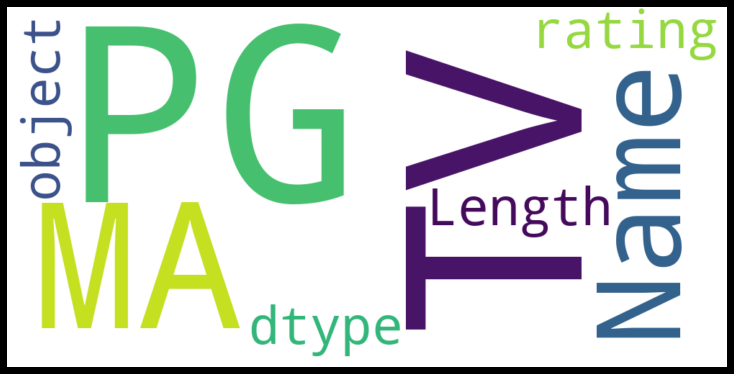

In [ ]:
#Top genres from united states
text = df_temp[df_temp['United States']==1]['rating']
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'k',
    edgecolor = 'k',)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

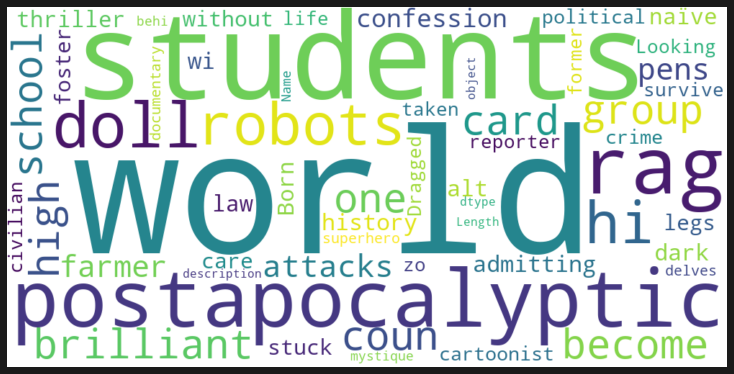

In [ ]:
text = df_temp[df_temp['United States']==1]['description']
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'k',
    edgecolor = 'k',)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

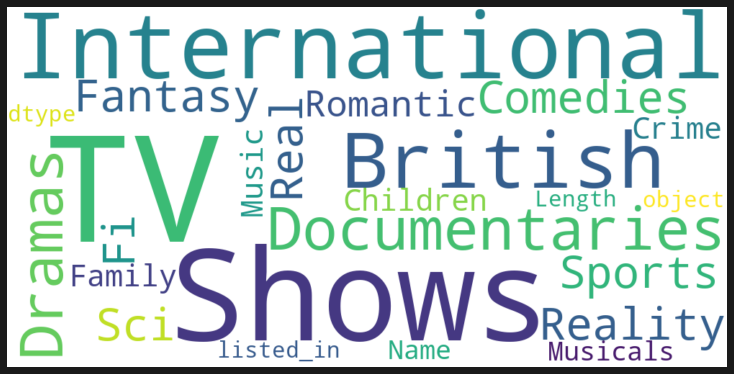

In [ ]:
#Top genres from 
text = df_temp[df_temp['United Kingdom']==1]['listed_in']
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'k',
    edgecolor = 'k',)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

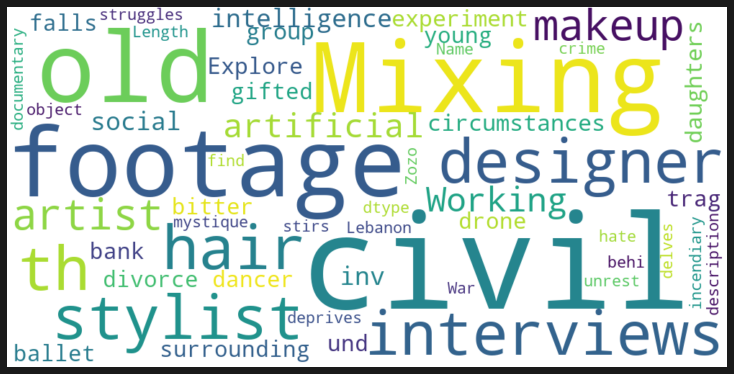

In [ ]:
text = df_temp[df_temp['United Kingdom']==1]['description']
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'k',
    edgecolor = 'k',)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

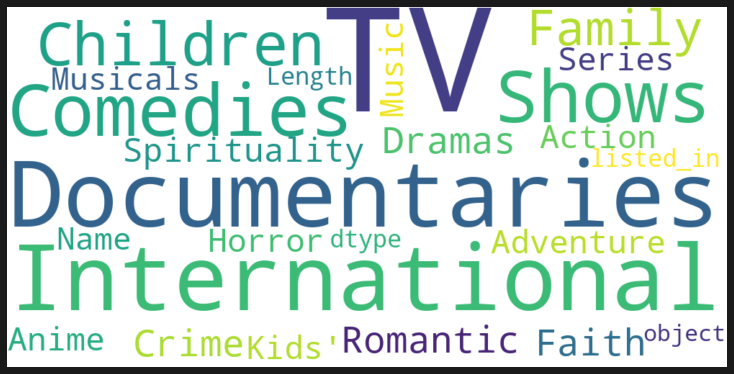

In [ ]:
#Top genres from 
text = df_temp[df_temp['Canada']==1]['listed_in']
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'k',
    edgecolor = 'k',)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

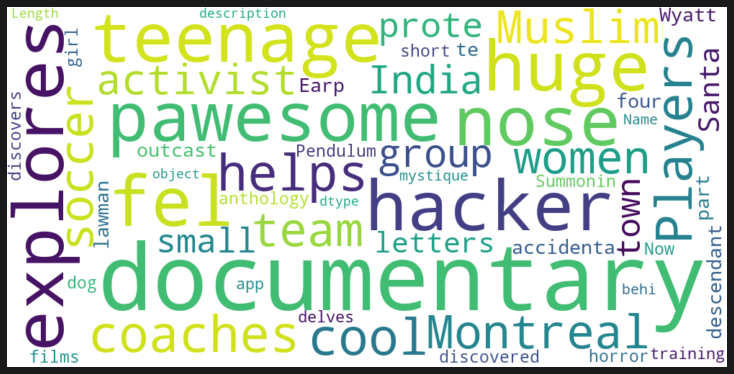

In [ ]:
text = df_temp[df_temp['Canada']==1]['description']
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'k',
    edgecolor = 'k',)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

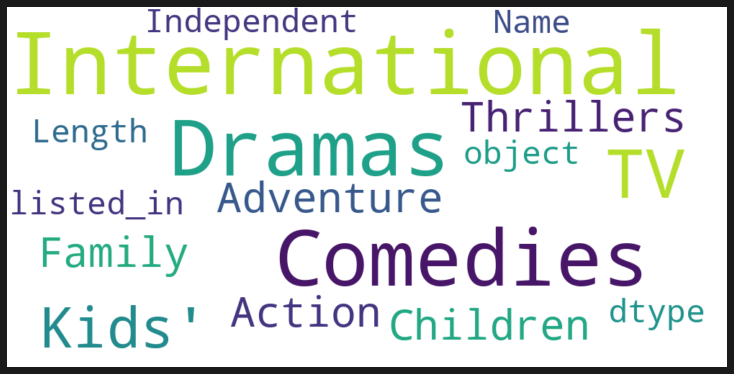

In [ ]:
#Top genres from 
text = df_temp[df_temp['France']==1]['listed_in']
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'k',
    edgecolor = 'k',)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

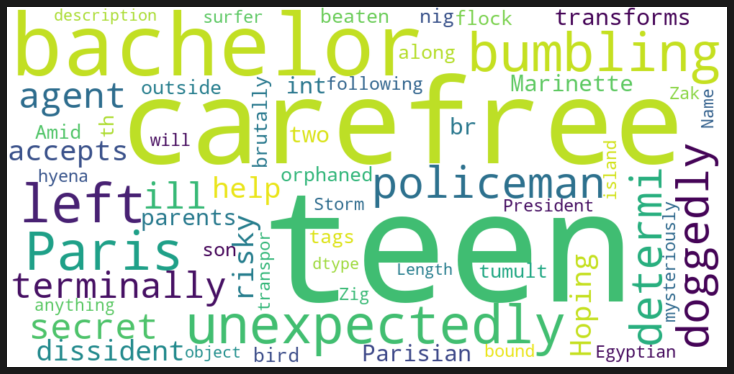

In [ ]:
text = df_temp[df_temp['France']==1]['description']
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'k',
    edgecolor = 'k',)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
df_temp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,United States,India,United Kingdom,Canada,France
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,0,0,0,0,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,0,0,0,0,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",0,0,0,0,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1,0,0,0,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,0,0,0,0


In [ ]:
from wordcloud import WordCloud,  STOPWORDS 

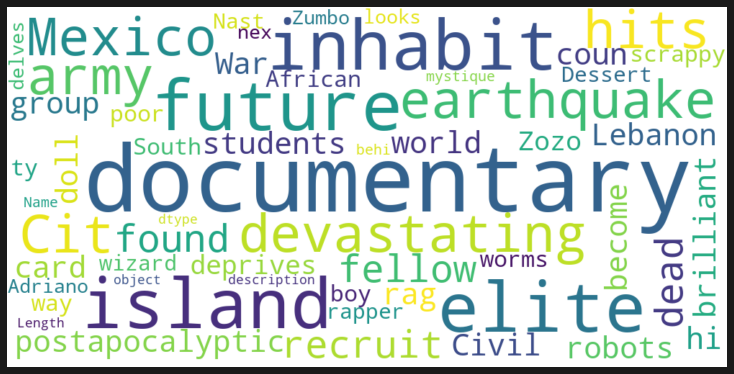

In [ ]:
#Word cloud on the final combined text column of the malware data
text = df['description']
wordcloud = WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'k',
    edgecolor = 'k',)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
new_df = df.copy()

#Understanding what type content is available in different countries

In [ ]:
new_df.country = df.country.fillna('United States')

In [ ]:
new_df.country = new_df.country.str.split(', ').tolist()
new_df['country'] = new_df['country'].explode(ignore_index=True)

In [ ]:
new_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Colombia,"October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",United States,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",South Korea,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


# Movie recommendation system #

In [ ]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl (13.7 MB)


In [ ]:
!python -m spacy download en_core_web_lg


     |████████████████████████████████| 778.8 MB 17 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy
from spacy.lang.en.examples import sentences
#!pip install en_core_web_lg
nlp = spacy.load('en_core_web_lg')

In [ ]:
# Create word vectors for all movies and TV show descriptions
with nlp.disable_pipes():
    vectors = np.array([nlp(film.description).vector for idx, film in df.iterrows()])

In [ ]:
# Function to analyze how similar two word vectors are
def cosine_similarity(a, b):
    return np.dot(a, b)/np.sqrt(a.dot(a)*b.dot(b))

In [ ]:
# Calculate the mean for all word vectors
vec_mean = vectors.mean(axis=0)

# Subtract the mean from the vectors
centered = vectors - vec_mean


In [ ]:
# Function to get the indices of the five most similar descriptions
def get_similar_description_indices(description_vec):
    
    # Calculate similarities between given description and other descriptions in the dataset
    sims = np.array([cosine_similarity(description_vec - vec_mean, vec) for vec in centered])
    
    # Get the indices of the five most similar descriptions
    most_similar_index = np.argsort(sims)[-6:-1]
    
    return most_similar_index

In [ ]:
# Create array of lists containing indices of five most similar descriptions
similar_indices = np.array([get_similar_description_indices(vec) for vec in vectors])


In [ ]:
similar_indices

7787

In [ ]:
test_index = df.index[df.title == "Behind Enemy Lines"][0]

print("Chosen Movie/TV Show")
print(df.title[test_index] + ': ' + df.description[test_index] + '\n')
print("Top Recommendations")
print(df.title[similar_indices[test_index][4]] + ': ' + df.description[similar_indices[test_index][4]] + '\n')
print(df.title[similar_indices[test_index][3]] + ': ' + df.description[similar_indices[test_index][3]] + '\n')
print(df.title[similar_indices[test_index][2]] + ': ' + df.description[similar_indices[test_index][2]] + '\n')
print(df.title[similar_indices[test_index][1]] + ': ' + df.description[similar_indices[test_index][1]] + '\n')
print(df.title[similar_indices[test_index][0]] + ': ' + df.description[similar_indices[test_index][0]] + '\n')

Chosen Movie/TV Show
Behind Enemy Lines: After dire setbacks in 1940, Winston Churchill commissions a new kind of fighting force: commandos trained to use stealth and audacious tactics.

Top Recommendations
Thunderbolt: A P-47 Thunderbolt squadron is shown in preparation, at play and in bombing raids aiming to halt Nazi supply lines and aid Allied ground troops.

A Bridge Too Far: This wartime drama details a pivotal day in 1944 when an Allied task force tried to win World War II by seizing control of key bridges in Holland.

The Outpost: A group of vastly outnumbered U.S. soldiers at a remote Afghanistan base must fend off a brutal offensive by Taliban fighters in the Battle of Kamdesh.

The Siege of Jadotville: Besieged by overwhelming enemy forces, Irish soldiers on a U.N. peacekeeping mission in Africa valiantly defend their outpost in this true story.

Mission of Honor: As Hitler's Nazis threaten to take command of Britain's skies, a squadron of Polish pilots arrives to aid the Ro

# what type of content is available #

In [ ]:
df['filtered'] = df['description'] + ' '+ df['listed_in']

In [ ]:
import re
def cleaned(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))
df['filtered'] = df['filtered'].apply(cleaned)

In [ ]:
df['filtered' ]= df['filtered'].str.lower()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [ ]:
def wordfilter(string, filtwords):
    filtered = []
    tokens = word_tokenize(string) 
    for word in tokens:
        if word not in filtwords:
            filtered.append(stemmer.stem(word))
    return filtered

df['filtered_new'] = ''
for item, row in df.iterrows():
    df.at[item, 'filtered_new'] = wordfilter(row['filtered'], stop_words)
    
df['filtered_new']

0       [futur, elit, inhabit, island, paradis, far, c...
1       [devast, earthquak, hit, mexico, citi, trap, s...
2       [armi, recruit, found, dead, fellow, soldier, ...
3       [postapocalypt, world, ragdol, robot, hide, fe...
4       [brilliant, group, student, becom, cardcount, ...
                              ...                        
7782    [lebanon, civil, war, depriv, zozo, famili, he...
7783    [scrappi, poor, boy, worm, way, tycoon, dysfun...
7784    [documentari, south, african, rapper, nasti, c...
7785    [dessert, wizard, adriano, zumbo, look, next, ...
7786    [documentari, delv, mystiqu, behind, bluesrock...
Name: filtered_new, Length: 7787, dtype: object

In [ ]:
def join_words(x):
  return " ".join(x)
df['filtered_new'] = df['filtered_new'].apply(join_words)

In [ ]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,filtered,filtered_new,clusters
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,in a future where the elite inhabit an island ...,futur elit inhabit island paradis far crowd sl...,3


In [ ]:
#using tfidf
words = df.filtered_new
from sklearn.feature_extraction.text import TfidfVectorizer
t_vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 1, max_features=10000)
X= t_vectorizer.fit_transform(words)
X

<7787x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 133010 stored elements in Compressed Sparse Row format>

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(X.toarray())

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'cumulative explained variance')

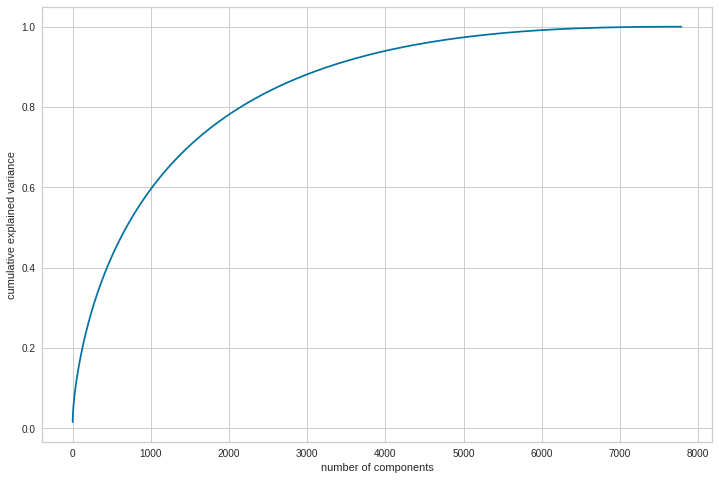

In [ ]:
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
#choosing right dim from plot, this might take a while, for ready ans use n_components = 300
from sklearn.decomposition import PCA
transformer = PCA(n_components=3000)
transformer.fit(X.toarray())
X_transformed = transformer.transform(X.toarray())
X_transformed.shape

(7787, 3000)

In [ ]:
# vectorizing the test and train
X_vectorized = t_vectorizer.transform(words)
#applying pca
X= transformer.transform(X_vectorized.toarray())
X

array([[ 1.99544428e-01, -2.19174443e-02, -3.16421428e-02, ...,
         4.05351449e-03,  4.34090696e-03,  1.08508780e-02],
       [-6.64899485e-02, -3.91111796e-02,  1.09423010e-02, ...,
        -1.89186125e-03,  2.98824487e-05,  3.88304916e-03],
       [-8.52980300e-02, -6.56983024e-02, -1.09954282e-02, ...,
         4.47695285e-03,  1.96915742e-03,  8.49649279e-03],
       ...,
       [-1.14613048e-01,  2.95287794e-01,  1.96466827e-01, ...,
         7.11133358e-03,  2.32698317e-03, -4.96751661e-03],
       [ 1.43503215e-01,  1.96444014e-02, -8.19601416e-03, ...,
        -1.04787678e-03,  2.41779860e-03,  3.66742617e-03],
       [-1.10940168e-01,  4.09155687e-01,  2.15370820e-01, ...,
        -1.41299968e-03, -7.59667691e-03, -5.05661405e-03]])

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 50, 50

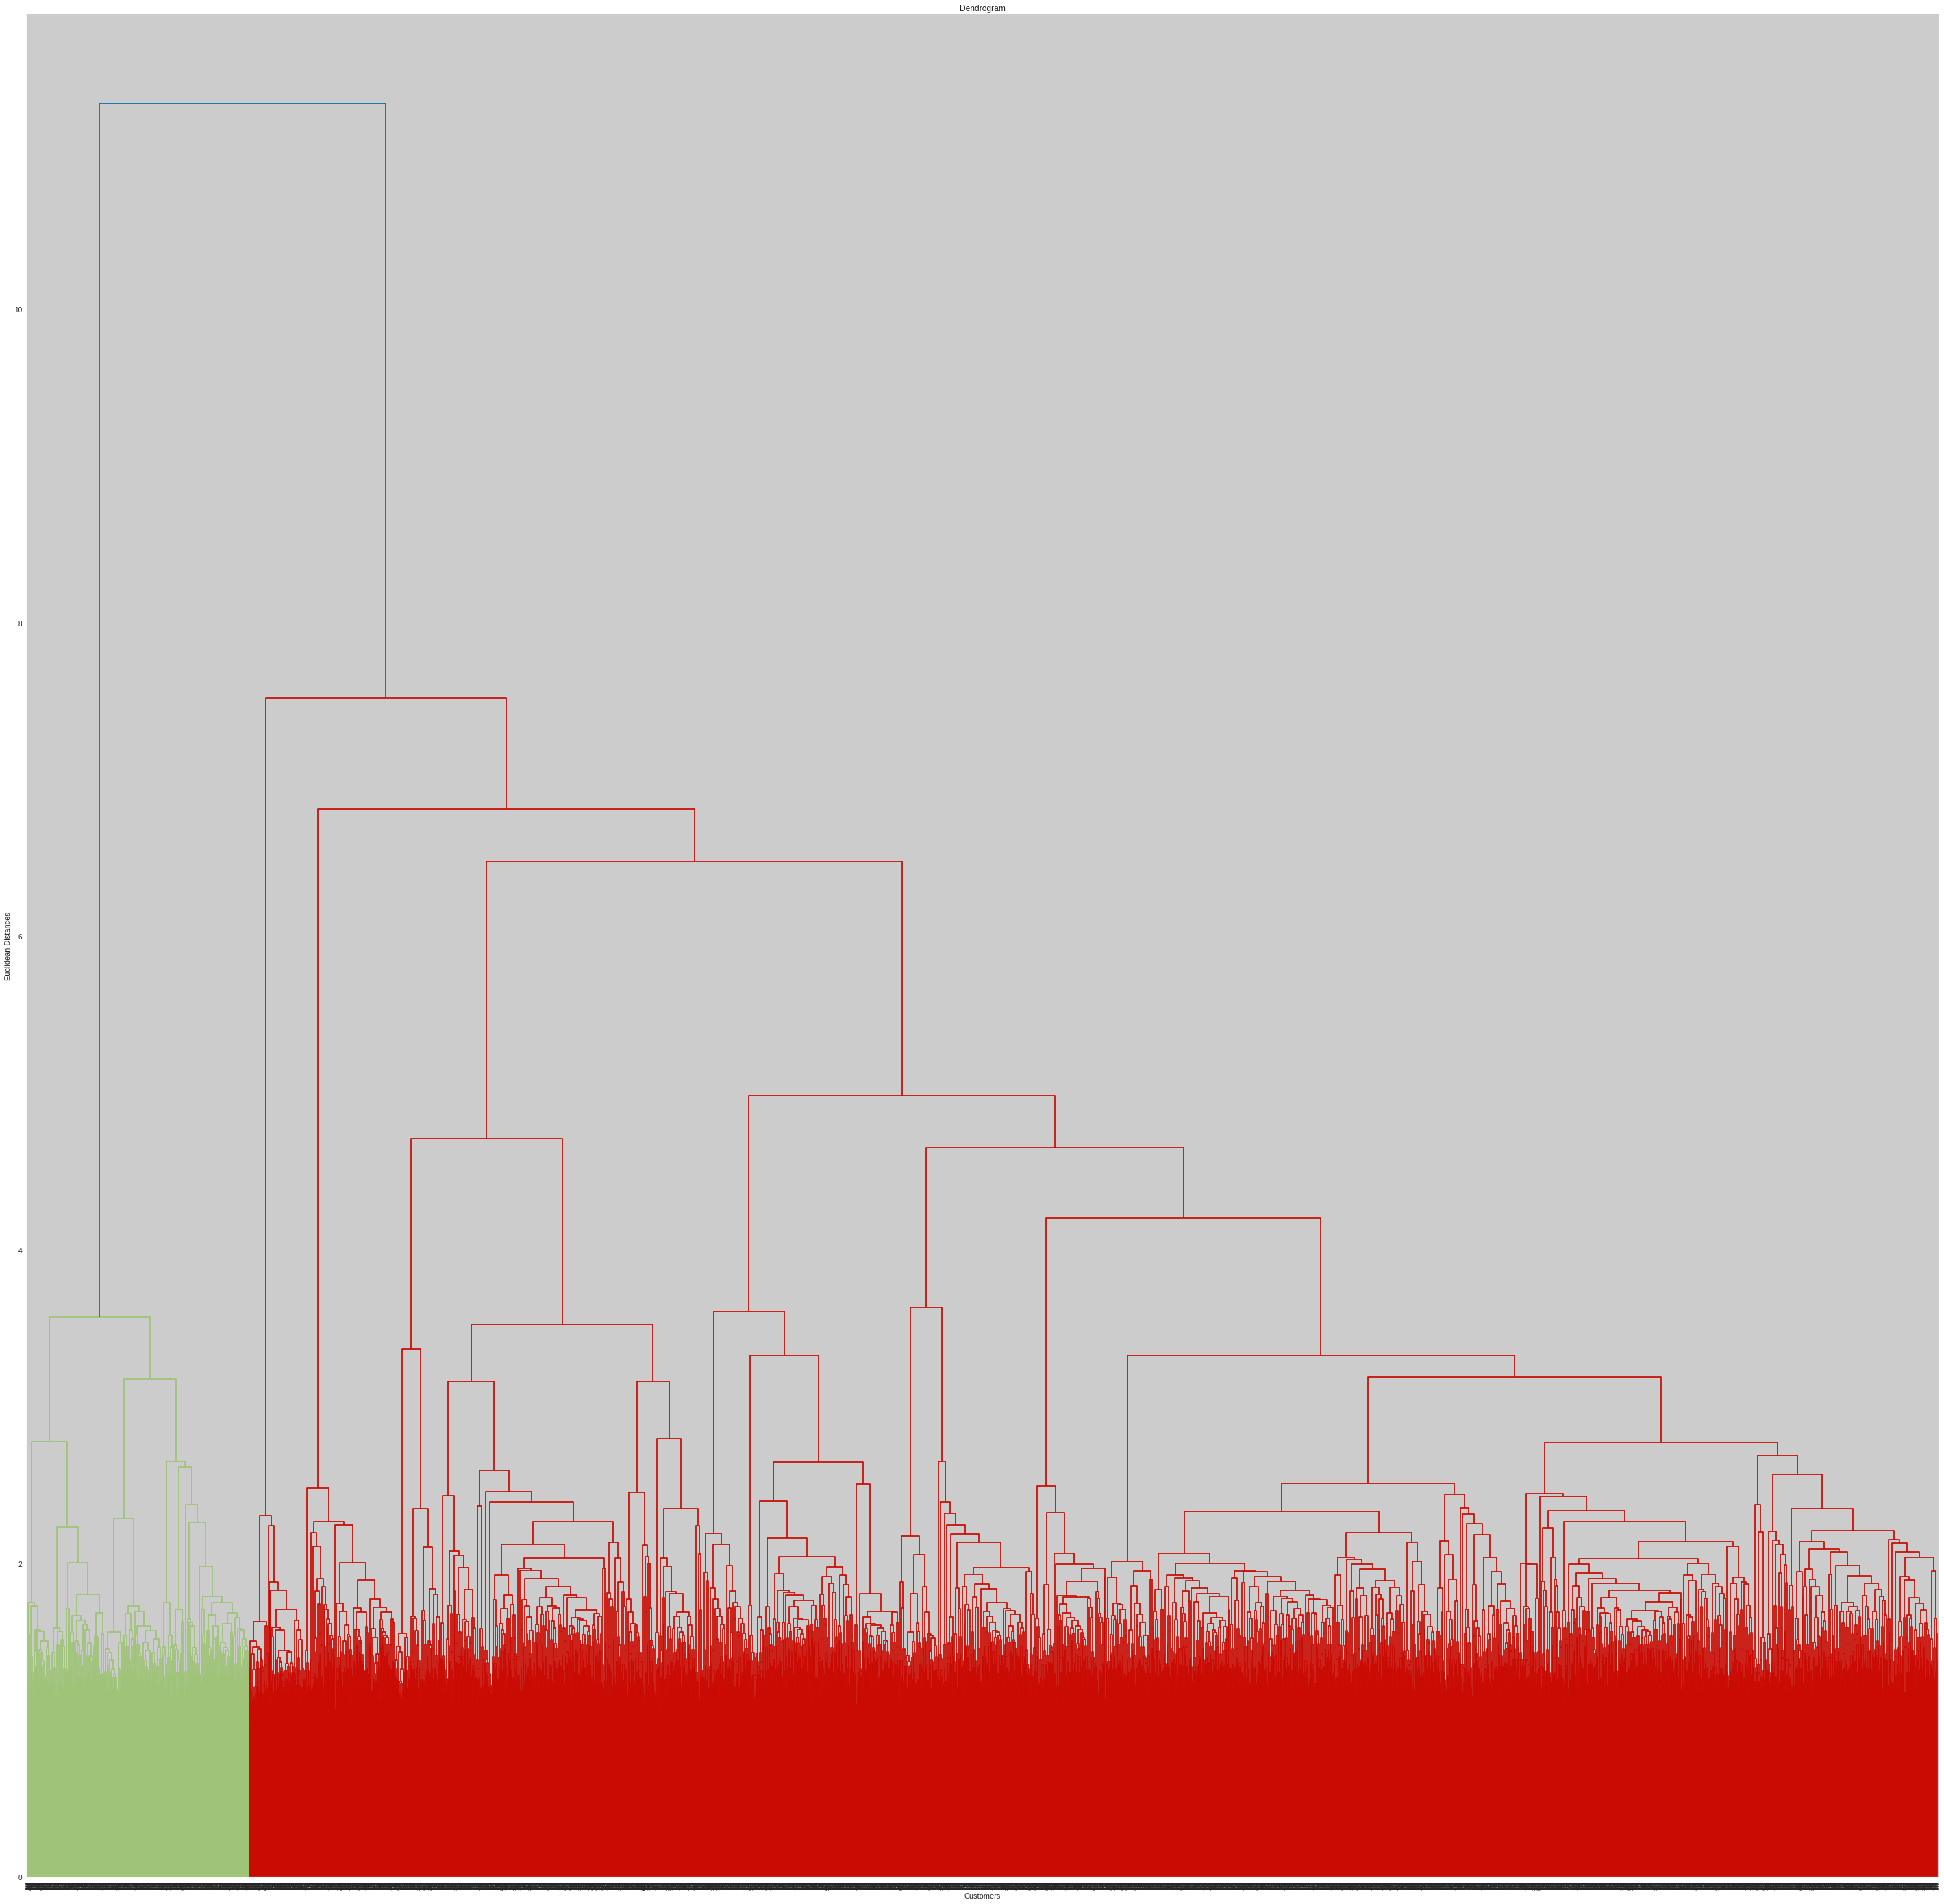

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fed9c262bd0>,
                 k=None, metric=None, model=None, timings=False)

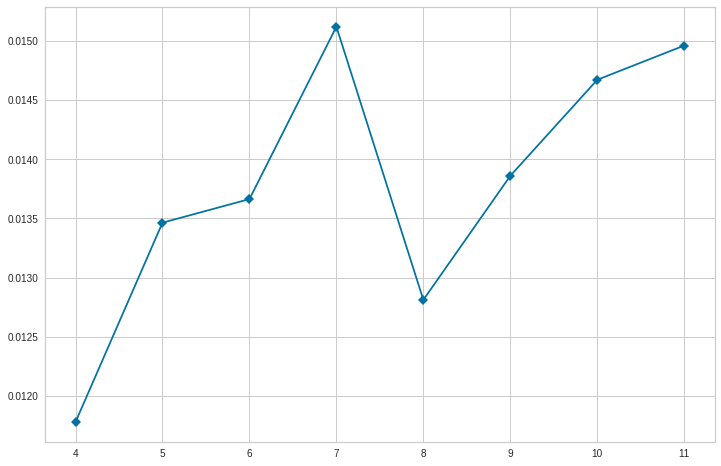

In [ ]:
rcParams['figure.figsize'] = 12, 8
# Sample code to run the KElbowVisualizer
from sklearn.cluster import KMeans
# from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

#  # Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='silhouette', timings=False
)

visualizer.fit(X) 

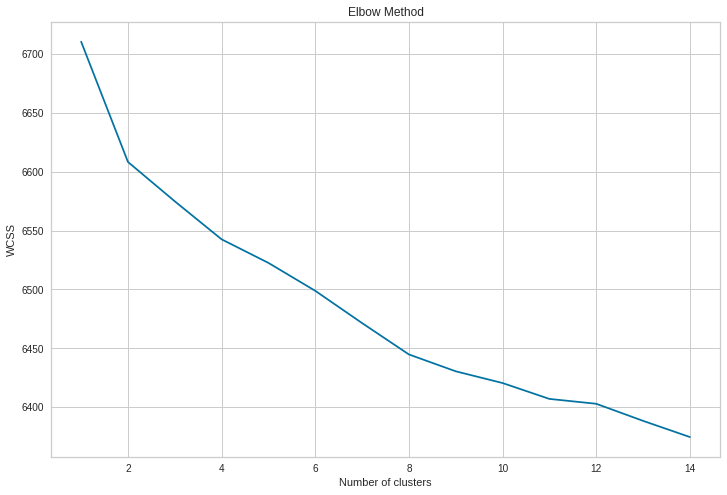

In [ ]:
rcParams['figure.figsize'] = 12, 8
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# fitting the k means algorithm on lower features

kmeans= KMeans(n_clusters=8, init= 'k-means++',max_iter=300, n_init=1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
from sklearn.metrics import silhouette_score
print("Silhouette Coefficient:  %0.3f"%silhouette_score(X, kmeans.labels_))

Silhouette Coefficient:  0.013


In [ ]:
#predict the labels of clusters.
label = kmeans.fit_predict(X)

ValueError: ignored

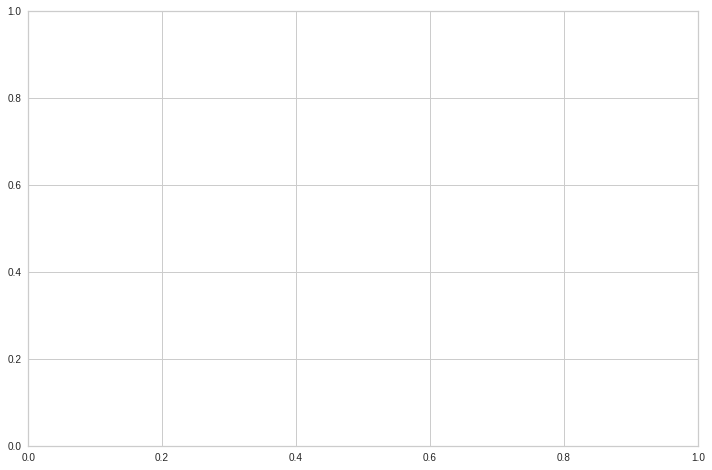

In [ ]:
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = t_vectorizer.get_feature_names()
for i in range(3):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

In [ ]:
df['clusters'] = kmeans.labels_

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,filtered,filtered_new,clusters
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,brazil international tv shows tv dramas tv sci...,brazil intern tv show tv drama tv scifi fantasi,3
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,mexico dramas international movies,mexico drama intern movi,2
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",singapore horror movies international movies,singapor horror movi intern movi,2
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",united states action adventure independent mo...,unit state action adventur independ movi scifi...,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,united states dramas,unit state drama,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,sweden czech republic united kingdom denmark n...,sweden czech republ unit kingdom denmark nethe...,2
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,india dramas international movies music musicals,india drama intern movi music music,2
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",nan,nan,0
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,australia international tv shows reality tv,australia intern tv show realiti tv,3


In [ ]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#word cloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = df[['clusters',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['clusters']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

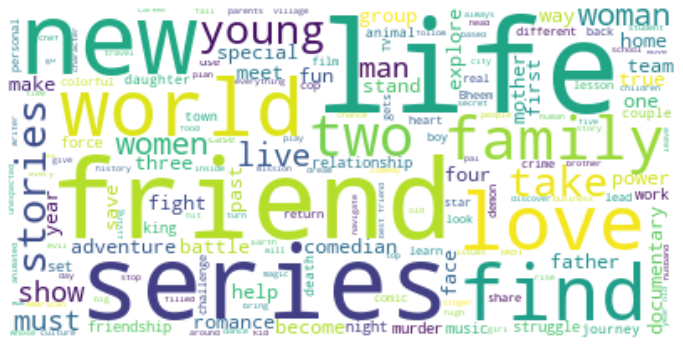

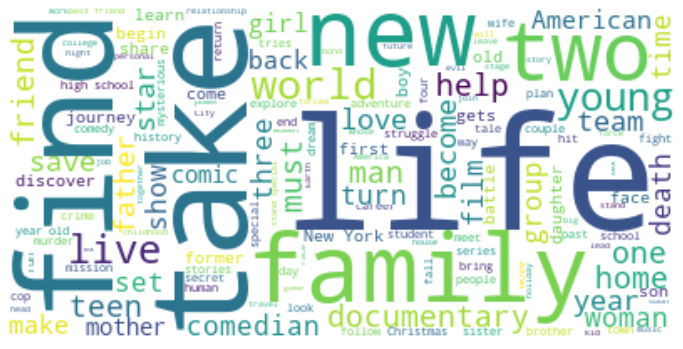

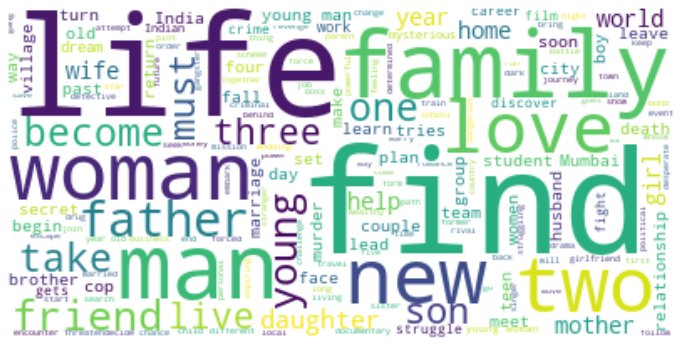

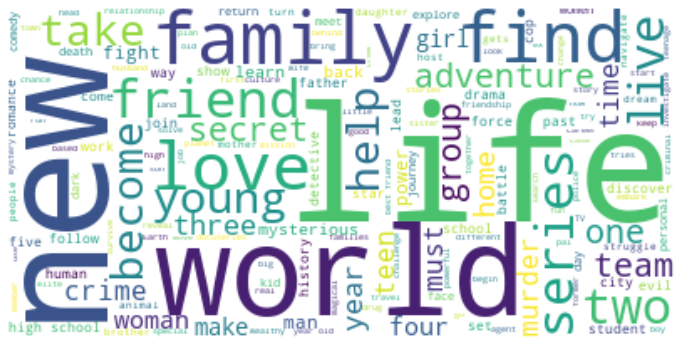

ValueError: ignored

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
for i in range(8):
  func_select_Category(i,'description')